# Introduction

In this project, we embark on an insightful journey to explore and analyze datasets related to heart health. 

1. Our primary objective is to uncover patterns and relationships that may provide valuable insights into factors affecting heart disease.

2. The data, derived from multiple reliable sources, offers a comprehensive view of various health metrics, such as cholesterol levels, resting blood pressure, and maximum heart rate.

3. By delving into this rich dataset, our aim is to understand better the intricate dynamics at play in heart health and disease. This analysis is not just an academic exercise; it holds the potential to inform and enhance healthcare strategies and personal health choices.

The datasets used in this project are gathered from two individual resources which provides medical test data related to heart.

Resources

a. https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

b. https://github.com/stat432/heart-analysis/blob/main/data/hd.csv


This variety allows us to approach our analysis from multiple angles, providing a well-rounded perspective on heart health.

1. We focus on cleaning, preprocessing, and exploring these datasets to ensure our analysis is grounded in robust and reliable data. 

2. Through this meticulous process, we aim to extract meaningful patterns and insights, ensuring that our conclusions are not just data-driven but also contextually relevant and potentially impactful in the field of healthcare.


# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

## Loading the data sets into pandas dataframes

In [2]:
hd_df = pd.read_csv('hd.csv')
heart_df = pd.read_csv('heart.csv')

1. We loaded the data sets into pandas dataframes Later we will  concatenate them into a single dataframe.
2. We used pandas df for better manipulating the data sets.

Displaying the first 5 rows of the both dataframes


In [3]:
hd_df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,location
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,v0,cl
1,67,1,4,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,v2,cl
2,67,1,4,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,v1,cl
3,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,v0,cl
4,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,v0,cl


In [4]:
heart_df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


##  Before joining
## let's inspect the columns of both data frames to find common columns for joining

In [5]:
common_columns = set(hd_df.columns).intersection(set(heart_df.columns))

# Displaying common columns
common_columns

{'age',
 'ca',
 'chol',
 'cp',
 'exang',
 'fbs',
 'oldpeak',
 'restecg',
 'sex',
 'slope',
 'thal',
 'thalach',
 'trestbps'}

# Joining the two dataframes

In [6]:
combined_df = pd.concat([hd_df, heart_df], ignore_index=True)

# Display the first few rows of the combined dataset
combined_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,location,target
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,v0,cl,NaN
1,67,1,4,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,v2,cl,NaN
2,67,1,4,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,v1,cl,NaN
3,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,v0,cl,NaN
4,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,v0,cl,NaN


## Splitting the 'heart.csv' dataset into two subsets based on a criterion, for example, age > 50 and age <= 50

In [7]:

subset1 = heart_df[heart_df['age'] > 50]
subset2 = heart_df[heart_df['age'] <= 50]

# Rejoining these subsets
artificially_joined_df = pd.concat([subset1, subset2], ignore_index=True)

# Displaying the first few rows
artificially_joined_df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0
9,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1


#  Data Aggregation

In [8]:
# Aggregation 1: Average cholesterol level by age group

# Creating age groups
age_bins = [0, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
combined_df['age_group'] = pd.cut(combined_df['age'], bins=age_bins, labels=age_labels, right=False)

# Calculating average cholesterol level by age group
agg1 = combined_df.groupby('age_group')['chol'].mean().reset_index()

# Aggregation 2: Count of patients by chest pain type (cp) and sex
agg2 = combined_df.groupby(['cp', 'sex']).size().reset_index(name='count')

# Displaying the results of both aggregations
agg1, agg2


(  age_group        chol
 0      0-30  199.285714
 1     31-40  207.452381
 2     41-50  227.689498
 3     51-60  226.030534
 4     61-70  223.375758
 5     71-80  220.365079
 6     81-90         NaN
 7    91-100         NaN,
    cp  sex  count
 0   0    0    133
 1   0    1    364
 2   1    0     67
 3   1    1    146
 4   2    0    170
 5   2    1    288
 6   3    0     66
 7   3    1    215
 8   4    0     70
 9   4    1    426)

- **Age Group Creation**: The code categorizes patients into age groups based on their age. These groups are defined in ranges of a decade each, starting from 0-30 up to 91-100 years. This classification is achieved by using the `pd.cut` function on the 'age' column of the `combined_df` DataFrame, facilitating age-specific analysis.

- **Average Cholesterol Level Calculation**: For each age group, the average cholesterol level is calculated. This is done by grouping the `combined_df` DataFrame by the newly created 'age_group' and then computing the mean of the 'chol' (cholesterol) column. The result is a clear representation of how average cholesterol levels vary across different age groups.

- **Patient Count by Chest Pain Type and Sex**: The code also performs an aggregation to count the number of patients grouped by their type of chest pain ('cp') and sex. This is accomplished through grouping the data by both 'cp' and 'sex', and then applying a count operation. The output from this aggregation provides insight into the distribution of chest pain types across different sexes, potentially revealing patterns or trends of clinical significance.

# Data Transformation

In [9]:

# Transformation 1: Create a new binary field for high cholesterol
combined_df['high_chol'] = (combined_df['chol'] > 240).astype(int)

# Transformation 2: Normalize 'thalach'
scaler = MinMaxScaler()
combined_df['thalach_norm'] = scaler.fit_transform(combined_df[['thalach']])

# Transformation 3: Categorize 'trestbps'
combined_df['bp_category'] = pd.cut(combined_df['trestbps'], bins=[0, 120, 140, np.inf], labels=['low', 'normal', 'high'])

# Transformation 4: Encode 'cp' as dummy variables
cp_dummies = pd.get_dummies(combined_df['cp'], prefix='cp')
combined_df = pd.concat([combined_df, cp_dummies], axis=1)

# Transformation 5: Log transformation of 'oldpeak'
combined_df['oldpeak_log'] = np.log1p(combined_df['oldpeak'])

# Display the first few rows of the transformed dataset
combined_df.head()


/Users/sathvikchowdaryveerapaneni/miniconda3/envs/tensorflow/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sathvikchowdaryveerapaneni/miniconda3/envs/tensorflow/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,age_group,high_chol,thalach_norm,bp_category,cp_0,cp_1,cp_2,cp_3,cp_4,oldpeak_log
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,...,61-70,0,0.633803,high,0,1,0,0,0,1.193922
1,67,1,4,160.0,286.0,0.0,2.0,108.0,1.0,1.5,...,61-70,1,0.338028,high,0,0,0,0,1,0.916291
2,67,1,4,120.0,229.0,0.0,2.0,129.0,1.0,2.6,...,61-70,0,0.485915,low,0,0,0,0,1,1.280934
3,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,...,31-40,1,0.894366,normal,0,0,0,1,0,1.504077
4,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,...,41-50,0,0.788732,normal,0,0,1,0,0,0.875469


- **Binary Field for High Cholesterol**: The code introduces a new binary field, 'high_chol', to the `combined_df` DataFrame. This field indicates whether a patient has high cholesterol, with a threshold set at 240. If a patient's cholesterol level ('chol') exceeds this value, 'high_chol' is marked as 1 (true); otherwise, it's marked as 0 (false). This transformation enables a straightforward identification of patients with high cholesterol levels.

- **Normalization of Maximum Heart Rate (`thalach`)**: The 'thalach' column, which represents the maximum heart rate, is normalized using the Min-Max Scaling technique. This process involves scaling the heart rate values to a range between 0 and 1, making the data suitable for analyses or models that might be sensitive to the scale of the data.

- **Categorization of Resting Blood Pressure (`trestbps`)**: The resting blood pressure values ('trestbps') are categorized into three groups: 'low', 'normal', and 'high'. This is done by defining specific bins for blood pressure ranges and assigning labels to these bins. Such categorization aids in simplifying the analysis by transforming a continuous variable into a categorical one.

- **Encoding Chest Pain Type (`cp`) as Dummy Variables**: The chest pain type ('cp') is converted into dummy variables, creating separate binary columns for each type of chest pain. This transformation is crucial for modeling and analysis, as it allows for the inclusion of categorical data in formats suitable for various algorithms.

- **Log Transformation of `oldpeak`**: A logarithmic transformation is applied to the 'oldpeak' column, which measures ST depression induced by exercise relative to rest. The log transformation (using `np.log1p`) can help in normalizing data and managing skewness, making the variable more suitable for certain statistical models or analyses.

In [10]:
# Save the combined DataFrame to a CSV file
combined_df.to_csv('combined_data.csv', index=False)

# Data Cleaning Function Modularity

In [11]:
# Function to perform basic data cleaning
def clean_data(df):
    # Checking for duplicate rows and drop them
    duplicates = df.duplicated().sum()
    df = df.drop_duplicates()

    # Check for missing values and replace them with the median (for numerical columns)
    for col in df.select_dtypes(include=['float64', 'int64']):
        if df[col].isnull().any():
            df[col].fillna(df[col].median(), inplace=True)

    # Check for missing values in categorical data and replace them with the mode
    for col in df.select_dtypes(include=['object', 'category']):
        if df[col].isnull().any():
            df[col].fillna(df[col].mode()[0], inplace=True)

    return df, duplicates


Function named `clean_data` is defined to perform basic data cleaning operations on a DataFrame.

Here's what the function does:

1. **Duplicate Removal**: The function first checks for and removes any duplicate rows in the DataFrame. It counts the number of duplicate rows before removing them, allowing for a record of how many duplicates were present.

2. **Handling Missing Values for Numerical Data**: For columns containing numerical data (identified as having data types 'float64' or 'int64'), the function checks for missing values (nulls) and replaces them with the median value of that column. Using the median is a common practice to handle missing numerical data, as it is less sensitive to outliers compared to the mean.

3. **Handling Missing Values for Categorical Data**: For columns with categorical data (data types 'object' or 'category'), the function fills in missing values with the mode of the column, which is the most frequently occurring value. This approach is suitable for categorical data as it preserves the most common category.

4. **Furnction Modularity**: The encapsulation of data cleaning steps into a function `clean_data` enhances the modularity of the code. This modularity makes the code more organized, reusable, and maintainable. It allows the same data cleaning process to be easily applied to different DataFrames without code duplication, promoting code reuse and simplicity. By calling `clean_data(df)`, one can clean any DataFrame `df`, making the function versatile and practical for various datasets in data analysis workflows.

# Performing the Cleaning Function on the data frames

In [12]:
# Clean the datasets
combined_data_df_cleaned, combined_duplicates = clean_data(combined_df)
hd_df_cleaned, hd_duplicates = clean_data(hd_df)
heart_df_cleaned, heart_duplicates = clean_data(heart_df)

/var/folders/pd/38jn5w_51k92jyv8dvk65ggm0000gn/T/ipykernel_16976/760512685.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].median(), inplace=True)
/var/folders/pd/38jn5w_51k92jyv8dvk65ggm0000gn/T/ipykernel_16976/760512685.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].mode()[0], inplace=True)
/var/folders/pd/38jn5w_51k92jyv8dvk65ggm0000gn/T/ipykernel_16976/760512685.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

# Checking the Null Values and dataframes after cleaning

In [13]:
# Check for null values after cleaning
combined_nulls = combined_data_df_cleaned.isnull().sum().sum()
hd_nulls = hd_df_cleaned.isnull().sum().sum()
heart_nulls = heart_df_cleaned.isnull().sum().sum()

cleaning_results = {
    "combined_data": {"duplicates_removed": combined_duplicates, "null_values_remaining": combined_nulls},
    "hd_data": {"duplicates_removed": hd_duplicates, "null_values_remaining": hd_nulls},
    "heart_data": {"duplicates_removed": heart_duplicates, "null_values_remaining": heart_nulls}
}

cleaning_results


{'combined_data': {'duplicates_removed': 725, 'null_values_remaining': 0},
 'hd_data': {'duplicates_removed': 2, 'null_values_remaining': 0},
 'heart_data': {'duplicates_removed': 723, 'null_values_remaining': 0}}

# Re-writing a better modular function for to perform transformation

In [14]:
class DataTransformer:
    def __init__(self, dataframe):
        self.df = dataframe
        self.scaler = MinMaxScaler()

    def add_binary_high_chol(self):
        self.df['high_chol'] = (self.df['chol'] > 240).astype(int)

    def normalize_thalach(self):
        self.df['thalach_norm'] = self.scaler.fit_transform(self.df[['thalach']])

    def categorize_trestbps(self):
        self.df['bp_category'] = pd.cut(self.df['trestbps'], bins=[0, 120, 140, np.inf], labels=['low', 'normal', 'high'])

    def encode_cp(self):
        cp_dummies = pd.get_dummies(self.df['cp'], prefix='cp')
        self.df = pd.concat([self.df, cp_dummies], axis=1)

    def log_transform_oldpeak(self):
        self.df['oldpeak_log'] = np.log1p(self.df['oldpeak'])

# Usage
# Assuming 'combined_df' is your DataFrame
transformer = DataTransformer(combined_df)
transformer.add_binary_high_chol()
transformer.normalize_thalach()
transformer.categorize_trestbps()
transformer.encode_cp()
transformer.log_transform_oldpeak()

# Now 'combined_df' will have all the transformations applied
print(combined_df.head())


   age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  ...  \
0   63    1   1     145.0  233.0  1.0      2.0    150.0    0.0      2.3  ...   
1   67    1   4     160.0  286.0  0.0      2.0    108.0    1.0      1.5  ...   
2   67    1   4     120.0  229.0  0.0      2.0    129.0    1.0      2.6  ...   
3   37    1   3     130.0  250.0  0.0      0.0    187.0    0.0      3.5  ...   
4   41    0   2     130.0  204.0  0.0      2.0    172.0    0.0      1.4  ...   

   age_group  high_chol  thalach_norm bp_category cp_0  cp_1 cp_2  cp_3  cp_4  \
0      61-70          0      0.633803        high    0     1    0     0     0   
1      61-70          1      0.338028        high    0     0    0     0     1   
2      61-70          0      0.485915         low    0     0    0     0     1   
3      31-40          1      0.894366      normal    0     0    0     1     0   
4      41-50          0      0.788732      normal    0     0    1     0     0   

  oldpeak_log  
0    1.193922  


/Users/sathvikchowdaryveerapaneni/miniconda3/envs/tensorflow/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sathvikchowdaryveerapaneni/miniconda3/envs/tensorflow/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


1. **Object-Oriented Approach**: The transformation process is encapsulated within a `DataTransformer` class, representing a significant shift from a procedural to an object-oriented approach. This class-based structure organizes different transformation methods under a single umbrella, making the code more structured and coherent.

2. **Enhanced Modularity and Reusability**: Each transformation step (like adding a binary high cholesterol field, normalizing 'thalach', categorizing 'trestbps', encoding 'cp', and log transforming 'oldpeak') is defined as a separate method within the class. This modularity enhances the reusability of the code, as each method can be independently called on the DataFrame attached to a `DataTransformer` instance. It allows for greater flexibility in applying specific transformations as needed.

3. **Improved Maintainability and Scalability**: With transformations encapsulated in a class, it becomes easier to maintain and scale the code. For instance, if a new transformation needs to be added or an existing one modified, it can be done within the respective method without affecting other parts of the code. This approach also makes the codebase more intuitive and easier to navigate, especially for larger projects or when collaborating with others.

# Visualizting the data using matplotlib and seaborn from combined dataframe

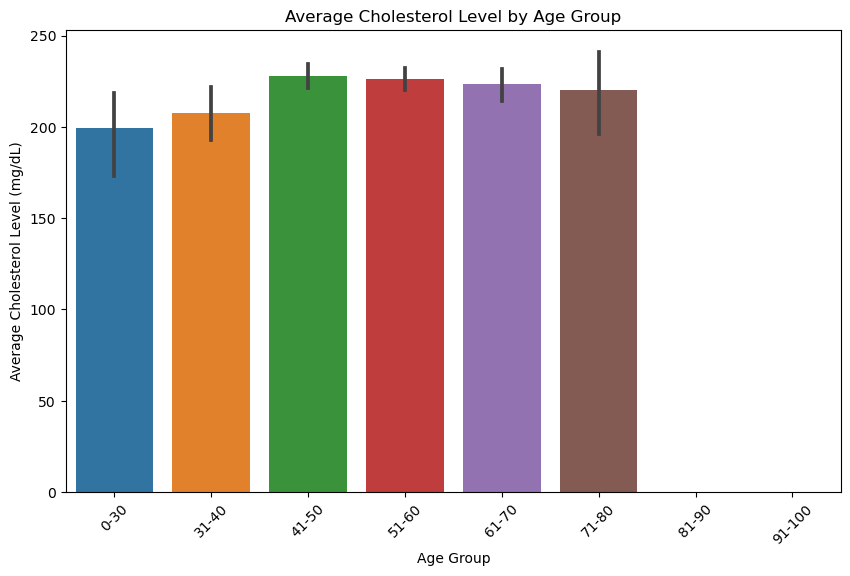

In [15]:


# Visualization 1: Age Group vs Average Cholesterol Level
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='chol', data=combined_df)
plt.title('Average Cholesterol Level by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Cholesterol Level (mg/dL)')
plt.xticks(rotation=45)
plt.show()


##  Bar plot average cholesterol level by age group:

- Cholesterol levels are relatively consistent across different age groups, ranging within a narrow band around the 200 mg/dL mark, which is often considered the borderline high level for total cholesterol.
  
- There is no clear trend indicating either an increase or decrease in average cholesterol levels with age; the levels fluctuate slightly but remain largely stable.

- The error bars indicate some variability within each age group, suggesting individual differences in cholesterol levels among people within the same age category.

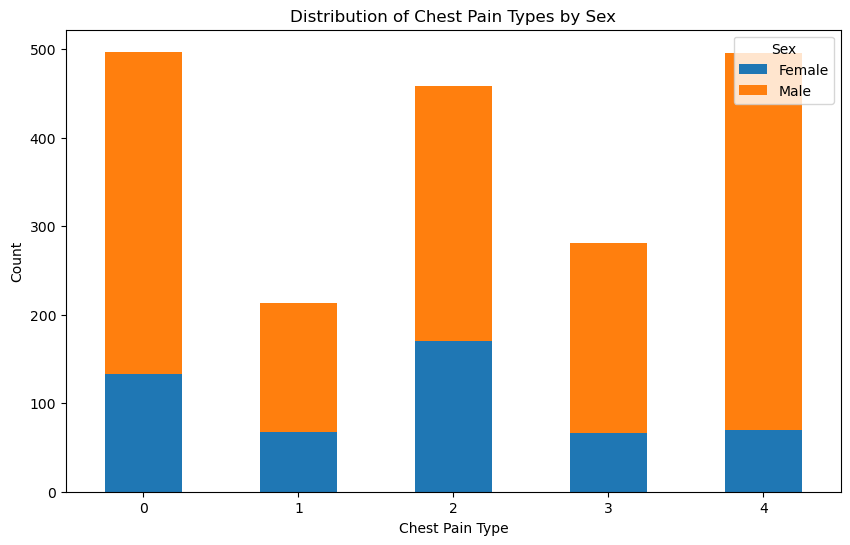

In [16]:
# Visualization 2: Distribution of Chest Pain Types by Sex
cp_sex_distribution = combined_df.groupby(['cp', 'sex']).size().unstack()
cp_sex_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Chest Pain Types by Sex')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.show()


## Stacked bar chart bar chart provided,the distribution of chest pain types by sex

- The most common type of chest pain reported does not differ much between males and females, with males slightly more in count.
  
- The least common type of chest pain (Type 3) is significantly less frequent in both sexes compared to other types, with a particularly lower prevalence among females.

- Males consistently report more cases of chest pain across all types when compared to females, as indicated by the larger orange segments in each bar.

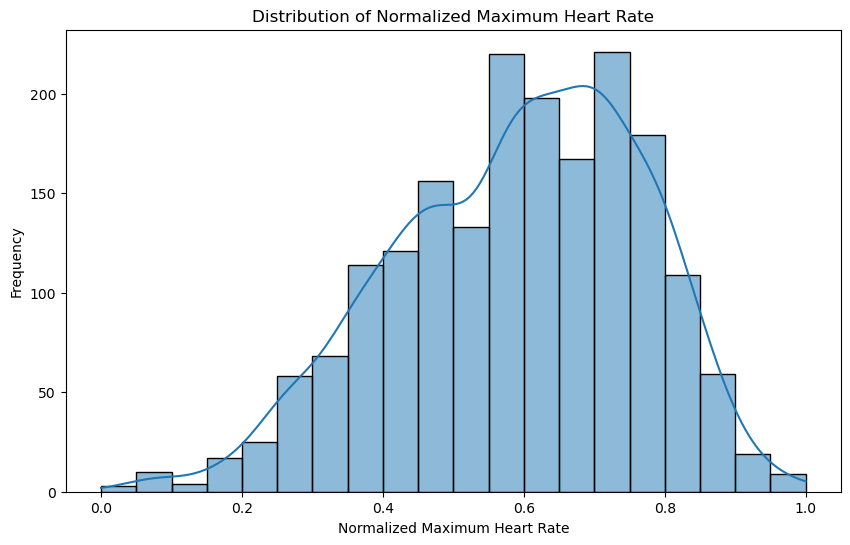

In [17]:
# Visualization 3: Normalized Maximum Heart Rate ('thalach_norm') Distribution
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['thalach_norm'], bins=20, kde=True)
plt.title('Distribution of Normalized Maximum Heart Rate')
plt.xlabel('Normalized Maximum Heart Rate')
plt.ylabel('Frequency')
plt.show()

In [18]:

def plot_kde(dataframe, column, title='KDE Plot', xlabel='', ylabel='Density'):
    """
    Generates a Kernel Density Estimate (KDE) plot for a specified column in a DataFrame.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the data.
    column (str): The name of the column to plot.
    title (str, optional): The title of the plot. Defaults to 'KDE Plot'.
    xlabel (str, optional): The label for the x-axis. Defaults to ''.
    ylabel (str, optional): The label for the y-axis. Defaults to 'Density'.
    """
    plt.figure(figsize=(8, 6))
    sns.kdeplot(dataframe[column], fill=True)
    plt.title(title)
    plt.xlabel(xlabel if xlabel else column)
    plt.ylabel(ylabel)
    plt.show()


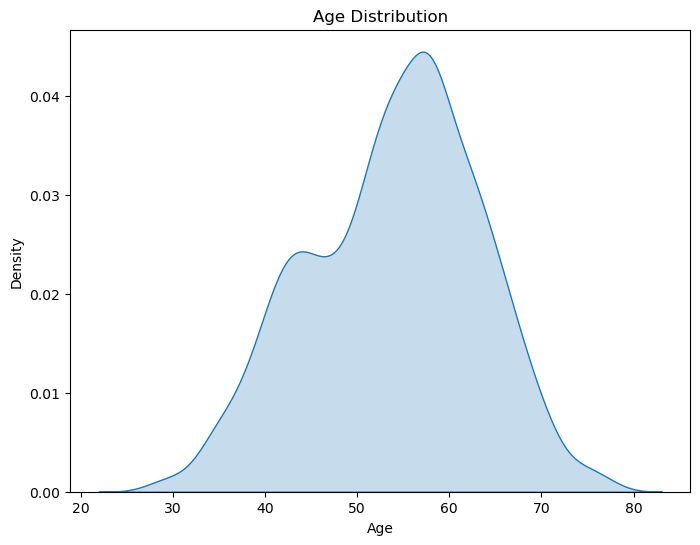

In [19]:
# Assuming 'combined_df' is your DataFrame and 'age' is the column you want to plot
plot_kde(combined_df, 'age', title='Age Distribution', xlabel='Age')


## kernel density plot represents for the age distribution:

- The age distribution has a bimodal shape with two peaks, suggesting that there are two age groups where the frequency of individuals is higher than the rest.

- The highest peak appears to be in the 55-60 age range, indicating a larger number of individuals in this age bracket within the dataset.

- There is a smaller peak around the age of 30, which suggests a secondary concentration of individuals in this younger age group.

# Statistical Analysis

In [20]:
descriptive_stats = combined_df.describe()
descriptive_stats

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,target,high_chol,thalach_norm,cp_0,cp_1,cp_2,cp_3,cp_4,oldpeak_log
count,1945.000000,1945.000000,1945.000000,1886.000000,1915.000000,1855.000000,1943.000000,1890.000000,1890.000000,1883.000000,...,1459.000000,1025.000000,1945.000000,1890.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1879.000000
mean,53.997429,0.739846,2.033933,131.849417,224.217232,0.156873,0.565106,143.819577,0.360847,0.983696,...,3.145990,0.513171,0.439075,0.590279,0.255527,0.109512,0.235476,0.144473,0.255013,-inf
std,9.249763,0.438831,1.515313,18.237299,87.584256,0.363779,0.674500,25.051598,0.480373,1.141370,...,1.720908,0.500070,0.496402,0.176420,0.436269,0.312360,0.424405,0.351659,0.435981,NaN
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-inf
25%,47.000000,0.000000,0.000000,120.000000,201.000000,0.000000,0.000000,125.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.457746,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,234.000000,0.000000,0.000000,146.000000,0.000000,0.600000,...,3.000000,1.000000,0.000000,0.605634,0.000000,0.000000,0.000000,0.000000,0.000000,0.470004
75%,61.000000,1.000000,4.000000,140.000000,272.500000,0.000000,1.000000,162.000000,1.000000,1.600000,...,3.000000,1.000000,1.000000,0.718310,1.000000,0.000000,0.000000,0.000000,1.000000,0.955511
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,...,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.974081


# Visualizing the scatter plot of the data

In [21]:
# Function to create scatter plot with regression line
def scatter_plot_with_regression(data, x_var, y_var, title):
    plt.figure(figsize=(10, 6))
    sns.regplot(x=x_var, y=y_var, data=data, line_kws={"color":"red"})
    plt.title(title)
    plt.show()

The code defines a function scatter_plot_with_regression that creates a scatter plot with a regression line for two variables from a given DataFrame. It uses Seaborn's regplot for plotting, which automatically fits and displays a regression model.

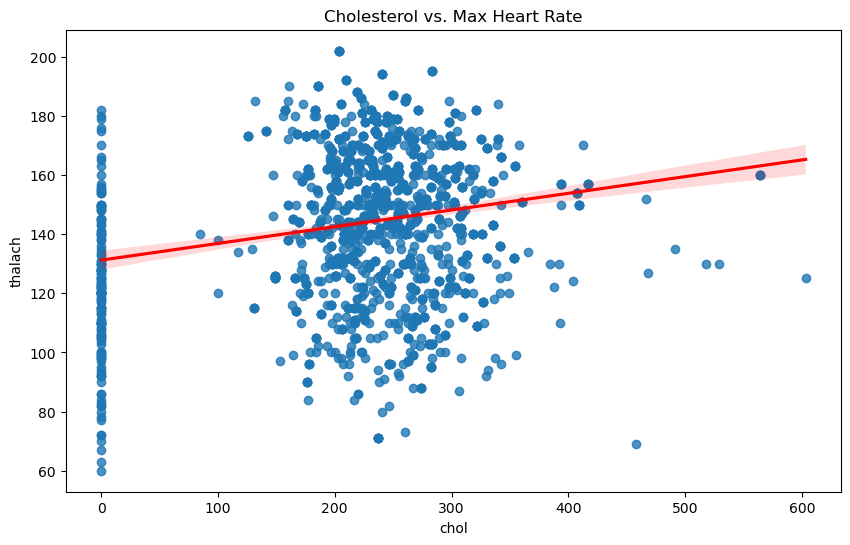

In [22]:

# Create scatter plots for the chosen relationships
scatter_plot_with_regression(combined_df, 'chol', 'thalach', 'Cholesterol vs. Max Heart Rate')


## Function calling with cholesterol (chol) and maximum heart rate (thalach) as parameters,

- Based on the scatter plot with a regression line for "Cholesterol vs. Max Heart Rate"

- There appears to be a very slight positive trend, suggesting that as cholesterol levels increase, the maximum heart rate increases as well; however, the relationship is not strong.

- The data points are widely spread out, indicating a lot of variability and suggesting that factors other than cholesterol may have a significant impact on maximum heart rate.

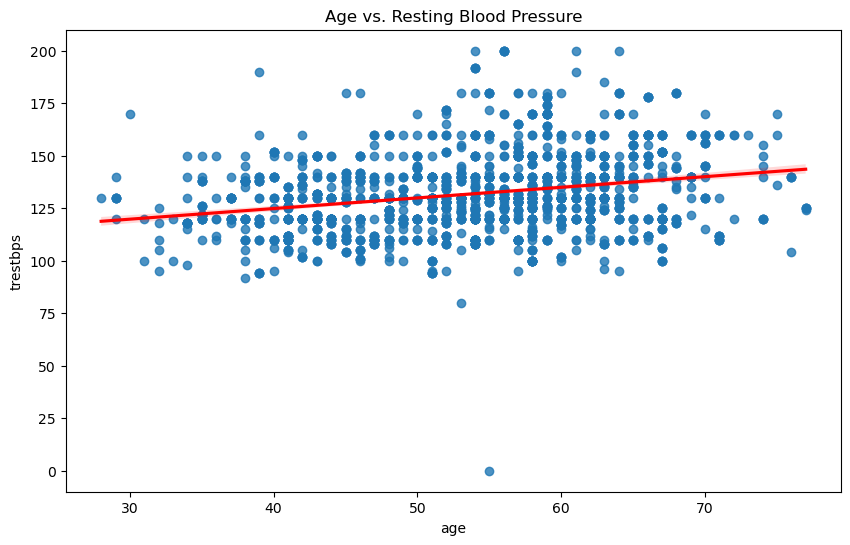

In [23]:
scatter_plot_with_regression(combined_df, 'age', 'trestbps', 'Age vs. Resting Blood Pressure')

#  Function call with age (age) and resting blood pressure (trestbps)

- scatter plot for "Age vs. Resting Blood Pressure":

- There is a positive correlation between age and resting blood pressure; as age increases, there is a tendency for resting blood pressure to rise as well.

- The spread of the data points indicates variability in the resting blood pressure across different ages, but the overall upward trend is visible.

# Correlation Matrix

/var/folders/pd/38jn5w_51k92jyv8dvk65ggm0000gn/T/ipykernel_16976/3817723966.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = combined_df.corr()


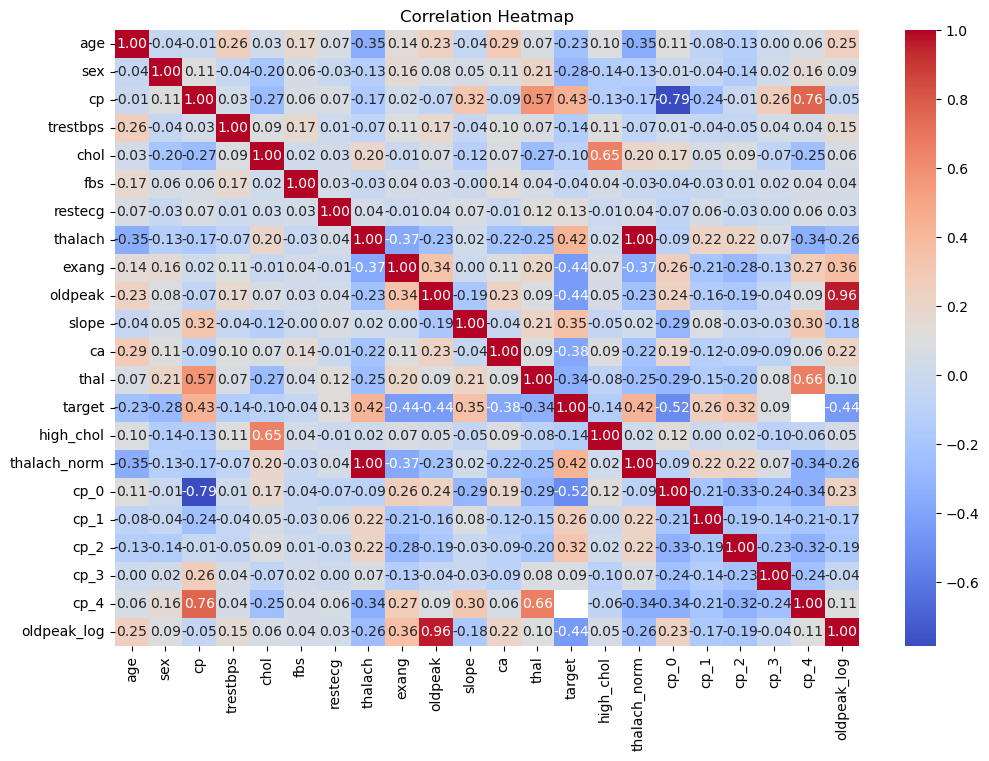

In [24]:
# Calculate the correlation matrix
corr = combined_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


From the heatmap

- The highest positive correlation is between `cp_4` and `sex` (0.76), indicating a strong association that might be relevant in clinical profiling or risk stratification.
  
- There is a notable negative correlation between `thalach` (maximum heart rate achieved) and `age` (-0.35), which aligns with physiological expectations that maximum heart rate decreases with age.

- The target variable shows significant inverse relationships with `thalach` (-0.44) and the type of chest pain `cp_0` (-0.43), suggesting that these could be potential indicators or predictors of the health outcome represented by the target.

# Violin Plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


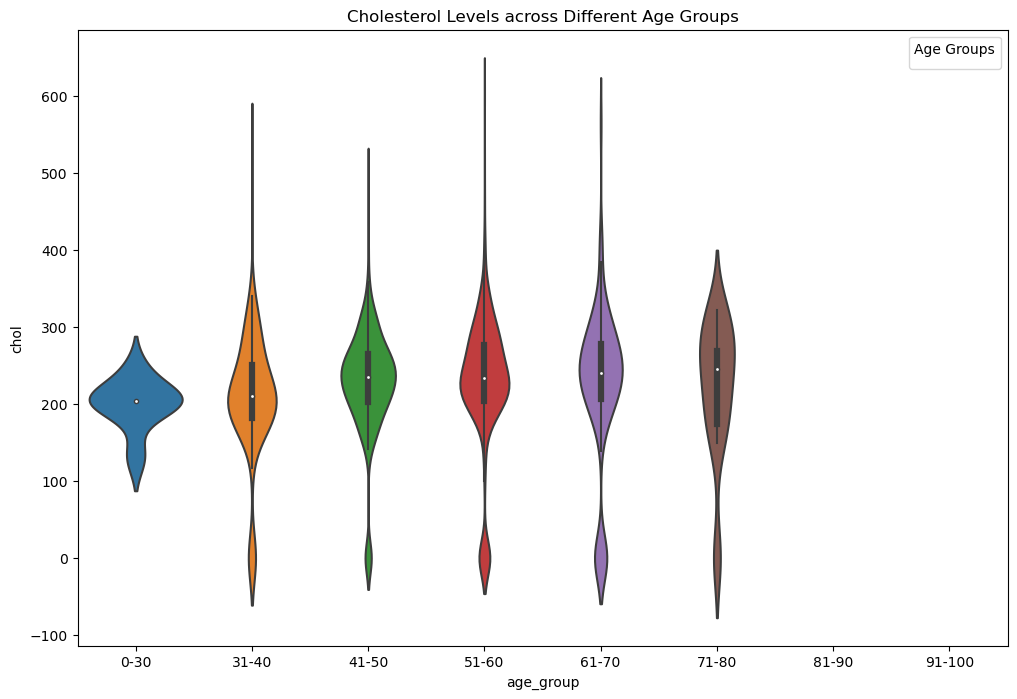

In [25]:
# Adding a legend to the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='age_group', y='chol', data=combined_df)
plt.title('Cholesterol Levels across Different Age Groups')
plt.legend(title='Age Groups', loc='upper right')
plt.show()


# Violin plot depicting cholesterol levels across different age groups
- Cholesterol levels show a wide distribution in each age group, with the median cholesterol level staying relatively consistent across the age spectrum.

- The age groups 51-60 and 61-70 have a slightly higher median cholesterol level compared to other groups, indicating a potential increase in cholesterol levels during this age range.

- The shape of the distribution for the youngest age group (0-30) is notably different, with a more pointed distribution, which may indicate less variability in cholesterol levels or a smaller sample size for this group.

- The oldest age group (91-100) also shows a different distribution, which might suggest different physiological factors affecting cholesterol at this advanced age or again, a smaller sample size.